A Data Science Framework: To Achieve 99% Accuracy
    
https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

https://medium.com/micin-developers/decipher-kernel-titanic-freeman-b48e069f76e8     

   
使えるライブラリの情報
https://pythondatascience.plavox.info/

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 14:00:49) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.1
matplotlib version: 3.1.1
NumPy version: 1.15.2
SciPy version: 1.1.0
IPython version: 7.8.0
scikit-learn version: 0.20.1
-------------------------


In [2]:
from subprocess import check_output
print(check_output(["dir",''], shell=True).decode("cp932"))

# Macならこう
# print(check_output(["ls", "../input"]).decode("utf8"))

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は C0EA-3C28 です

 C:\Users\iidatakuya\jupyter_program\kaggle_practice\titanic のディレクトリ

2019/09/11  17:19    <DIR>          .
2019/09/11  17:19    <DIR>          ..
2019/09/10  16:44    <DIR>          .ipynb_checkpoints
2019/09/10  17:07            27,932 001_titanic.ipynb
2019/09/11  17:19         1,375,410 002_titanic_A_Data_Science_Framework_To_Achieve_99%_Accuracy.ipynb
2019/09/10  17:39            22,148 003_titanic_upra.ipynb
2019/09/10  17:07             3,258 gender_submission.csv
2019/09/10  17:37             3,258 submission.csv
2018/04/09  05:33            28,629 test.csv
2018/04/09  05:33            61,194 train.csv
               7 個のファイル           1,521,829 バイト
               3 個のディレクトリ  12,973,613,056 バイトの空き領域



# A Data Science Framework

## Define the Problem:  
If data science, big data, machine learning, predictive analytics, business intelligence, or any other buzzword is the solution, then what is the problem? As the saying goes, don't put the cart before the horse. Problems before requirements, requirements before solutions, solutions before design, and design before technology. Too often we are quick to jump on the new shiny technology, tool, or algorithm before determining the actual problem we are trying to solve.
  
## Gather the Data:  
John Naisbitt wrote in his 1984 (yes, 1984) book Megatrends, we are “drowning in data, yet staving for knowledge." So, chances are, the dataset(s) already exist somewhere, in some format. It may be external or internal, structured or unstructured, static or streamed, objective or subjective, etc. As the saying goes, you don't have to reinvent the wheel, you just have to know where to find it. In the next step, we will worry about transforming "dirty data" to "clean data."  
  
## Prepare Data for Consumption:  
This step is often referred to as data wrangling, a required process to turn “wild” data into “manageable” data. Data wrangling includes implementing data architectures for storage and processing, developing data governance standards for quality and control, data extraction (i.e. ETL and web scraping), and data cleaning to identify aberrant, missing, or outlier data points.
Perform Exploratory Analysis: Anybody who has ever worked with data knows, garbage-in, garbage-out (GIGO). Therefore, it is important to deploy descriptive and graphical statistics to look for potential problems, patterns, classifications, correlations and comparisons in the dataset. In addition, data categorization (i.e. qualitative vs quantitative) is also important to understand and select the correct hypothesis test or data model.
  
## Model Data:  
Like descriptive and inferential statistics, data modeling can either summarize the data or predict future outcomes. Your dataset and expected results, will determine the algorithms available for use. It's important to remember, algorithms are tools and not magical wands or silver bullets. You must still be the master craft (wo)man that knows how-to select the right tool for the job. An analogy would be asking someone to hand you a Philip screwdriver, and they hand you a flathead screwdriver or worst a hammer. At best, it shows a complete lack of understanding. At worst, it makes completing the project impossible. The same is true in data modelling. The wrong model can lead to poor performance at best and the wrong conclusion (that’s used as actionable intelligence) at worst.
  
## Validate and Implement Data Model:  
After you've trained your model based on a subset of your data, it's time to test your model. This helps ensure you haven't overfit your model or made it so specific to the selected subset, that it does not accurately fit another subset from the same dataset. In this step we determine if our model overfit, generalize, or underfit our dataset.
  
## Optimize and Strategize:  
This is the "bionic man" step, where you iterate back through the process to make it better...stronger...faster than it was before. As a data scientist, your strategy should be to outsource developer operations and application plumbing, so you have more time to focus on recommendations and design. Once you're able to package your ideas, this becomes your “currency exchange" rate.

# Step 1: Define the Problem（課題設定をする）  
- 課題：「Titanic沈没時の生存結果を予測するアルゴリズムの開発」


# Step 2: Gather the Data（データ収集）
- データ収集方法：KaggleからDownloadする。
   
  
KaggleではStep1,2は済んでいるので、3から行う


# Step 3: Prepare Data for Consumption（前処理を行う）  
- 3.1 Import Libraries（必要なライブラリのインポート）
- 3.2 Meet and Greet Data (データとの交流)
- 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting
       (Correcting：異常値と外れ値への対策, Completing：欠損値の補完, Creating：分析のための新特徴生成, Converting：機械学習の入力とするための数値化)
- 3.22 Clean Data（データの整形）

# Step 4: Perform Exploratory Analysis with Statistics（統計による探索的分析の実行）

全ての変数が密に数値化されたため、ここから先は以下を実施すると記述されています。   
・グラフィカル統計にてデータを調べ、変数の説明・要約を実施   
・説明変数、目的変数間の相関関係を調査


# Step 5: Model Data（データをモデリングする）

さて、データの準備ができたところで、いよいよ機械学習の適用。
尚、Freemanさんは、このChapter冒頭、以下ポイントを語っている。


・Data Scienceは、「mathematics」「computer science」「business management」の間の学際的分野  
・殆どの人が、何れかの分野に寄りかかる傾向がある   
・上記3つは、3本のスツールのようなもので、どれが欠けてもよろしくない   
・数学の知識については、一先ずは「高レベルな概要」で大丈夫   
・問題を捉えるビジネス的な洞察力が必要    
・結局のところ、盲導犬のトレーニングのように、我々から学ぶことであり、その逆ではない    
・エントリの障壁が低くなると、使用ツールへの理解が低くなり、誤った結論が出る可能性があり、最悪の場合はプロジェクトの完成を不可能にする   
・kernelを通して学ぶ重要なことは、何をするのかよりも、何故するのかである   
・強化学習は、教師あり学習と、教師なし学習のハイブリッド（モデルはすぐに正しい答えを与えられるのではなく、一連のイベントの後に与えられる）   
・ロジスティック回帰は名前に回帰がありますが、実際は分類アルゴリズムです   
  
前の説明でFreemanさんは「機械学習は、魔法の杖や銀の弾丸ではない」とも言っていました。ここでは、その点について、もう少し掘下げています。   
  
   
そして、Freemanさんは更に、「Data Science 101：How to Choose a Machine Learning Algorithm (MLA)」と題して、以下のポイントも語っています。（「101」は、「初級編・入門者向けの・基礎編」という意味）   
・データモデリングについては、最良のアルゴリズムを事前に推し量ることができないという「No Free Lunch Theorem」が存在、全てのデータセットに機能するスーパーアルゴリズムはない   
・複数の機械学習手法を試して、精度比較するのが良い   
・データ量がものを言う派や、アルゴリズムがものを言う派がいる   
・決定木、Random Forest、Boostingが初心者にはオススメ   
・決定木は特に、直感的に理解が容易い    
以上。なるほど、Try&Error的に複数のモデルを試してみることが大事だということですね.   
研究という感じですね。決定木系のアルゴリズムを使った方が良いというのは分かる気がしますね。回帰分析を元としたアルゴリズムは、ベースの考え方が確かに結構難しいですからね。   


In [3]:
# 3.1 Import Libraries


#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

# xgboostないときは
# !pip install xgboostすればおｋ

In [4]:
# 3.2 Meet and Greet Data


#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data_raw = pd.read_csv('train.csv') # raw：未加工の、生の


#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_val  = pd.read_csv('test.csv') # val：評価用の


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True) # defaultはtrueなのでdeep=Trueを省略してcopy()で良い 

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val] # passing by reference ：参照渡し


#preview data
print (data_raw.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_raw.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_raw.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
data_raw.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S


In [5]:
# このKernelでは「1. Correcting：異常値と外れ値への対策」は行っていない。
# Freemanさんは、「2. Completing：欠損値の補完」を行うに当たり、
# 先ず、以下のコードでその様相を見える化している。


print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
# （欠損値の補完、または欠損のあるデータ行削除を、学習データ・テストデータ・提出用の検証データに対して実施する）

for dataset in data_cleaner:    
    #complete missing age with median : Ageの欠損を、中央値で補完
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode : Embarkedの欠損を、最頻値で補完
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median : Fareの欠損を、中央値で補完
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
# 不要なカラムは削除する
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)
    # axis=1で列
    # inplace=Trueにすれば変更を元のデータに反映させることが可能 このとき、返り値はない。

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [7]:
###CREATE: Feature Engineering for train and test/validation dataset
# （精度向上に向けた特徴設計を、学習データ・テストデータ・提出用の検証データに対して実施する）


for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    # （即席の汚いコードで、名前から、title(Mr,Ms,Mrsなどのこと)を抜き出す） 
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
        # expand=True でデータフレームの型で返す カラムは0,1,...と自動で番号が振られる。
        #              DefaultはFalseでSeriesが返され、valueがnp.arrayの配列になる 

        
    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    # 連続値を離散化する、頻度基準 vs 値域基準）
    
    # データ処理のデータ分類の際、よく使われるのがqcut関数とcut関数です。
    # 2つの関数は主に以下のような違いを持っています。

    # qcut関数
    # 　　指定した数だけデータを等分する
    # cut関数
    # 　　指定した領域ごとにデータを分割する
    
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4) # データを4等分する。返値はそれが属する幅を返す。なのでbinという名前をつけている

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/

# 「必要な最小サンプルサイズは？」とよく聞かれます。
# これはおそらく私のお気に入りの質問の1つです。off the cuff（即席）でサンプルサイズの計算を実行することはありませんが、
# 10は適切な最小のNです。多くの場合、再現性/信頼性分析のコンテキストでこの質問に答えていますが、
# 通常は「10、10以上」と答えています。学生として、フィッティング不足を防ぐために、
# 回帰モデルには独立変数（IV）ごとに10の被験者が必要であると教えられていますが、
# このIVあたりの適切な被験者数の概念は、最小のサンプルサイズに広がるのはなぜですか？
# 判明したように、サンプルサイズの見積もりでは10（またはその周辺）が魔法の数字であると考える
# 正当な理由がいくつかあります。

# 標準の正規分布（µ = 0、sd = 1）があると仮定します。 
# Stataのいくつかの簡単なコードを使用して、95％信頼区間のスパンがサンプルサイズに対してどのように変化するかを
# 確認できます。
 
    
# 10個未満の名前はMiscとして一括で扱う
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
# apply関数とlambda関数は、即席の汚いコードで、検索hitが少ない行数の値を、任意の値で置き換えることができる）
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)



#preview data again
data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
485,0,3,"Lefebre, Miss. Jeannie",female,28.0,3,1,25.4667,S,5,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
732,0,2,"Knight, Mr. Robert J",male,28.0,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
595,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,24.1500,S,3,0,Mr,"(14.454, 31.0]","(32.0, 48.0]"
881,0,3,"Markun, Mr. Johann",male,33.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(32.0, 48.0]"
16,0,3,"Rice, Master. Eugene",male,2.0,4,1,29.1250,Q,6,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"
529,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,11.5000,S,4,0,Mr,"(7.91, 14.454]","(16.0, 32.0]"
824,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,39.6875,S,6,0,Master,"(31.0, 512.329]","(-0.08, 16.0]"
632,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,30.5000,C,1,1,Misc,"(14.454, 31.0]","(16.0, 32.0]"
46,0,3,"Lennon, Mr. Denis",male,28.0,1,0,15.5000,Q,2,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
727,1,3,"Mannion, Miss. Margareth",female,28.0,0,0,7.7375,Q,1,1,Miss,"(-0.001, 7.91]","(16.0, 32.0]"


In [8]:
# ------------------------実験-----------------------------------------------

print(dataset['Name'].head())
print("-"*100)
aaa= dataset['Name'].str.split(", ") # Series型
bbb= dataset['Name'].str.split(", ", expand=True) # DF型
ccc= dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
ddd = ccc.value_counts()
print(aaa.head())
print("-"*100)
print(bbb.head())
print("-"*100)
print(bbb[1].head())
print("-"*100)
print(ccc.head())
print("-"*100)
print(ddd) # Series型
eee = (ddd < 10)
print("-"*100)
print(eee)
print(eee.loc[:])
ddd = ccc.apply(lambda x: 'Misc' if eee.loc[x] == True else x)
print("-"*100)
print(ddd.head())

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object
----------------------------------------------------------------------------------------------------
0                                [Kelly, Mr. James]
1                [Wilkes, Mrs. James (Ellen Needs)]
2                       [Myles, Mr. Thomas Francis]
3                                [Wirz, Mr. Albert]
4    [Hirvonen, Mrs. Alexander (Helga E Lindqvist)]
Name: Name, dtype: object
----------------------------------------------------------------------------------------------------
          0                                   1
0     Kelly                           Mr. James
1    Wilkes            Mrs. James (Ellen Needs)
2     Myles                  Mr. Thomas Francis
3      Wirz                          Mr. Alb

In [9]:
# ------------------------実験-----------------------------------------------
print(pd.qcut(dataset['Fare'], 4).head())
print("-"*100)
print(pd.cut(dataset['Age'].astype(int), 5).head()) # Ageがなぜかfloat型なのでintに変えている


0    (-0.001, 7.896]
1    (-0.001, 7.896]
2    (7.896, 14.454]
3    (7.896, 14.454]
4    (7.896, 14.454]
Name: Fare, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.472] < (31.472, 512.329]]
----------------------------------------------------------------------------------------------------
0    (30.4, 45.6]
1    (45.6, 60.8]
2    (60.8, 76.0]
3    (15.2, 30.4]
4    (15.2, 30.4]
Name: Age, dtype: category
Categories (5, interval[float64]): [(-0.076, 15.2] < (15.2, 30.4] < (30.4, 45.6] < (45.6, 60.8] < (60.8, 76.0]]


In [10]:
# ------------------------実験-----------------------------------------------
from pandas import Series # データ列 
from pandas import DataFrame # データフレーム
from numpy.random import randn
a = DataFrame(randn(9).reshape((3,3)),index=['A','B','D'],columns=['col1','col2','col3'])
b = DataFrame(randn(9).reshape((3,3)),index=['A','B','D'],columns=['col1','col2','col3'])
c = [a,b*2]
print(c)
for sample in c:
    continue
print(sample) # forで生成した個別のイテラブルデータの変数は消えずに最後の要素が代入されたまま残る

[       col1      col2      col3
A -0.728256 -0.999148  0.874362
B -1.911994 -1.212974  1.156300
D  1.111398  0.145181 -0.400512,        col1      col2      col3
A  4.784910  0.783162  1.682330
B  1.597659  1.419083 -0.844382
D  4.143968 -0.171308 -1.309890]
       col1      col2      col3
A  4.784910  0.783162  1.682330
B  1.597659  1.419083 -0.844382
D  4.143968 -0.171308 -1.309890


In [11]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset
#（カテゴリ分類にコード値が用いられている変数について、1-K符号化や、コードから連続値への変換を、学習データ・テストデータ・提出用の検証データに対して実施する）


#code categorical data
# 文字列などを0,1,2...というダミー変数に置き換える
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x]) 
# get_dummiesはカラム名を列名にした離散値表現にする（ダミーというのはその新しいDFのカラム名が値になるから）
# 元々値が連続値のカラムは何もしない　以下のprintの結果を参照されたし
print("-"*20)
print(data1[data1_x].head())
print("-"*20)
print(data1_dummy.head())
print("-"*20)

data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

--------------------
      Sex  Pclass Embarked Title  SibSp  Parch   Age     Fare  FamilySize  \
0    male       3        S    Mr      1      0  22.0   7.2500           2   
1  female       1        C   Mrs      1      0  38.0  71.2833           2   
2  female       3        S  Miss      0      0  26.0   7.9250           1   
3  female       1        S   Mrs      1      0  35.0  53.1000           2   
4    male       3        S    Mr      0      0  35.0   8.0500           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  
--------------------
   Pclass  SibSp  Parch   Age     Fare  FamilySize  IsAlone  Sex_female  \
0       3      1      0  22.0   7.2500           2        0           0   
1       1      1  

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [12]:
print('Train columns with null values: \n', data1.isnull().sum())
print("nullないしOK\n")
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("予測用のテストデータはCabinだけ残っている（テスト用の方はdropしてないからだけど）")
print("-"*10)
print (data_val.info())
print("-"*10)
#以上を見ると、cabinを除いて、訓練用データも最後のテスト用のデータもデータが綺麗になったことが確認できた

# 元のデータはどんなだったかを見ておこう
data_raw.describe(include = 'all')


# これにて、4CによるData Cleaningが完了しました。
# そして、このChapterの最後に、この後の機械学習実施のために、学習データ・テストデータに分割しています。

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
nullないしOK

----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [13]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

# random_state=: データを分割する際の乱数のシード値
# 同じ結果が返るように 0 を指定していますが、これは勉強用であり普段は指定しません


print("Data1 Shape: {}".format(data1.shape)) # shapeで(行数, 列数)を出力

# 元々のデータは特徴量19個だったが定義xの特徴量選択によって19から8までに絞った

print("Train1 Shape: {}".format(train1_x.shape)) # 学習データとテストデータの分割によって(668, 8)と
print("Test1 Shape: {}".format(test1_x.shape))   # (223, 8)に分割されている

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [14]:
train1_x.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
105,1,3,2,3,0,0,28.0,7.8958
68,0,3,2,2,4,2,17.0,7.9250
253,1,3,2,3,1,0,30.0,16.1000
320,1,3,2,3,0,0,22.0,7.2500
706,0,2,2,4,0,0,45.0,13.5000


In [15]:
test1_x.head() # 左のインデックスを見るとランダムに分割されていることが分かる（train_test_splitによる）

,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
495,1,3,0,3,0,0,28.0,14.4583
648,1,3,2,3,0,0,28.0,7.5500
278,1,3,1,0,4,1,7.0,29.1250
31,0,1,0,4,1,0,28.0,146.5208
255,0,3,0,4,0,2,29.0,15.2458


##  再褐



# Step 1: Define the Problem（課題設定をする）  
- 課題：「Titanic沈没時の生存結果を予測するアルゴリズムの開発」


# Step 2: Gather the Data（データ収集）
- データ収集方法：KaggleからDownloadする。
   
  
KaggleではStep1,2は済んでいるので、3から行う


# Step 3: Prepare Data for Consumption（前処理を行う）  
- 3.1 Import Libraries（必要なライブラリのインポート）
- 3.2 Meet and Greet Data (データとの交流)
- 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting
       (Correcting：異常値と外れ値への対策, Completing：欠損値の補完, Creating：分析のための新特徴生成, Converting：機械学習の入力とするための数値化)
- 3.22 Clean Data（データの整形）


## 次ここから↓　　　
# Step 4: Perform Exploratory Analysis with Statistics（統計による探索的分析の実行）

全ての変数が密に数値化されたため、ここから先は以下を実施すると記述されています。   
・グラフィカル統計にてデータを調べ、変数の説明・要約を実施   
・説明変数、目的変数間の相関関係を調査



# Step 5: Model Data（データをモデリングする）

さて、データの準備ができたところで、いよいよ機械学習の適用。
尚、Freemanさんは、このChapter冒頭、以下ポイントを語っている。


・Data Scienceは、「mathematics」「computer science」「business management」の間の学際的分野  
・殆どの人が、何れかの分野に寄りかかる傾向がある   
・上記3つは、3本のスツールのようなもので、どれが欠けてもよろしくない   
・数学の知識については、一先ずは「高レベルな概要」で大丈夫   
・問題を捉えるビジネス的な洞察力が必要    
・結局のところ、盲導犬のトレーニングのように、我々から学ぶことであり、その逆ではない    
・エントリの障壁が低くなると、使用ツールへの理解が低くなり、誤った結論が出る可能性があり、最悪の場合はプロジェクトの完成を不可能にする   
・kernelを通して学ぶ重要なことは、何をするのかよりも、何故するのかである   
・強化学習は、教師あり学習と、教師なし学習のハイブリッド（モデルはすぐに正しい答えを与えられるのではなく、一連のイベントの後に与えられる）   
・ロジスティック回帰は名前に回帰がありますが、実際は分類アルゴリズムです   
  
前の説明でFreemanさんは「機械学習は、魔法の杖や銀の弾丸ではない」とも言っていました。ここでは、その点について、もう少し掘下げています。   
  
   
そして、Freemanさんは更に、「Data Science 101：How to Choose a Machine Learning Algorithm (MLA)」と題して、以下のポイントも語っています。（「101」は、「初級編・入門者向けの・基礎編」という意味）   
・データモデリングについては、最良のアルゴリズムを事前に推し量ることができないという「No Free Lunch Theorem」が存在、全てのデータセットに機能するスーパーアルゴリズムはない   
・複数の機械学習手法を試して、精度比較するのが良い   
・データ量がものを言う派や、アルゴリズムがものを言う派がいる   
・決定木、Random Forest、Boostingが初心者にはオススメ   
・決定木は特に、直感的に理解が容易い    
以上。なるほど、Try&Error的に複数のモデルを試してみることが大事だということですね.   
研究という感じですね。決定木系のアルゴリズムを使った方が良いというのは分かる気がしますね。回帰分析を元としたアルゴリズムは、ベースの考え方が確かに結構難しいですからね。   


In [16]:


# Step 4: Perform Exploratory Analysis with Statistics（統計による探索的分析の実行）

# 要するにデータの中身をつぶさに観察し、関連性を直感的に推察しようという訳
# それに当たってFreemanさんは、先ず、各変数値との相関値を、print命令にて出力している

In [17]:
#Discrete Variable Correlation by Survival using
#　離散変数相関を生存率を使ってみる
#  扱う変数が量的変数の場合、離散型変数(discrete variable)と、
#  連続型変数(continuous variable)に分類することができる


# 一旦特徴量を思い出そう
print(data1_x)
print(data1_x_bin)
print(data1_x_dummy)
print("\n")

for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        # 単純に各特徴量と生存率の相関を見る
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean()) # mean平均だと0と1の平均より割合が出せる
        print('-'*10, '\n')

#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
print('----以下のfor文の処理が何しているのかを細かく可視化してみよう----\n')
print(data1[['Sex', Target[0]]].head())
print(data1[[x, Target[0]]].groupby(x).sum()) 
# groupby を使うと、デフォルトでグループラベルが index になる。index にしたく無い場合は as_index=False を指定する。
# ここではグループラベルをindexにしたくないので、as_index=Falseにするのが普通
print(data1[[x, Target[0]]].groupby(x, as_index=False).sum()) # meanではなくsumにしてみるとカウントしてくれる
print('----end----\n\n')

#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
# pd.crosstab(x,y)でxとyのクロス集計表を作れる
print(pd.crosstab(data1['Title'],data1[Target[0]]))

['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
['Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs']


Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1    

In [18]:
# 次に、以下データの分布を可視化しています。
# 「Fare」
# 「Age」
# 「FamilySize」

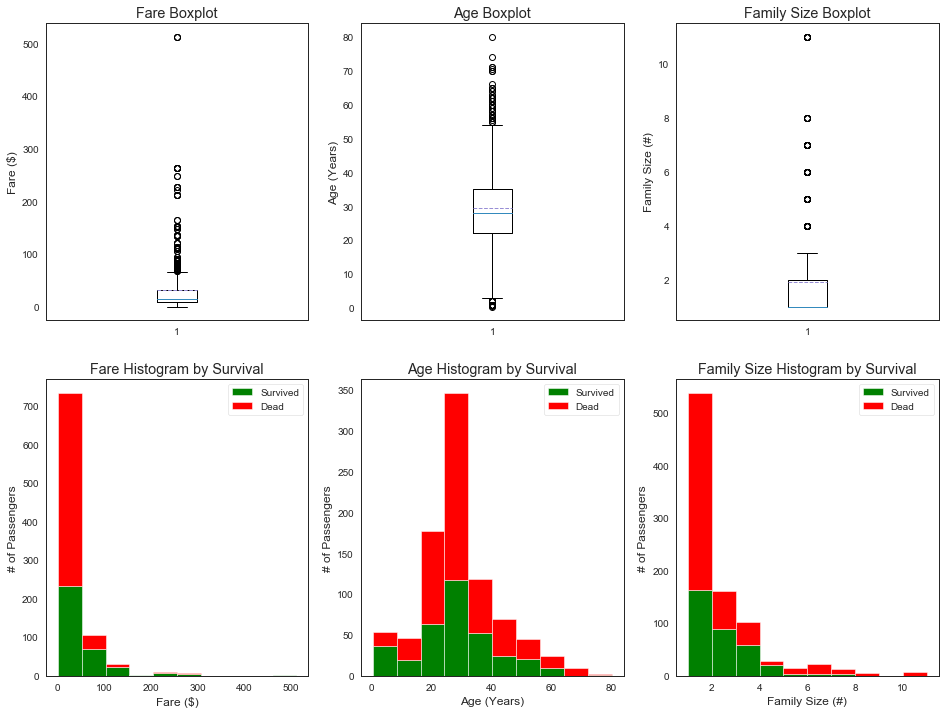

In [19]:
#IMPORTANT: Intentionally plotted different ways for learning purposes only. 
#重要；学習目的のみのために意図的に異なる方法をプロットしました。

#optional plotting w/pandas: https://pandas.pydata.org/pandas-docs/stable/visualization.html
#選択的なプロットができるpandas

#we will use matplotlib.pyplot: https://matplotlib.org/api/pyplot_api.html
# matplotlib.pyplotを使う

#to organize our graphics will use figure: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#subplot: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
#and subplotS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots


#graph distribution of quantitative data
plt.figure(figsize=[16,12])
# --------------①figsize=(16,12)で図のサイズを決めています。数字はインチ。デフォルトが(8,6)。


# --------------②一つの設定の仕方
plt.subplot(231)
# matplotlib ライブラリーの subplot メソッドを使うことで、一つの描画キャンパスを複数の領域に分割して、
# それぞれのサブ領域でグラフを作成することができるようになる。
# plt.subplot(1,2,1) # figure内の枠の大きさとどこに配置している。subplot(行の数,列の数,何番目に配置しているか)
# plt.subplot(121)とカンマなしで書くことも可能

plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
# boxplot(箱髭図)
#   showmeans=True デフォルト値はFalse（平均値を描かない）
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')


#---------------②end

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')


#histgram
plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend() #凡例表示

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()


In [20]:
# 上段の図は、典型的な箱ヒゲ図です。最大値・最小値・四分値以外に、平均値の線もプロットされている工夫がある
# 外れ値の検出が同時にできていて良い
# 下段の図は、ヒストグラムです。そして、値域毎の「Survived = 0 or 1」の割合も可視化されています。

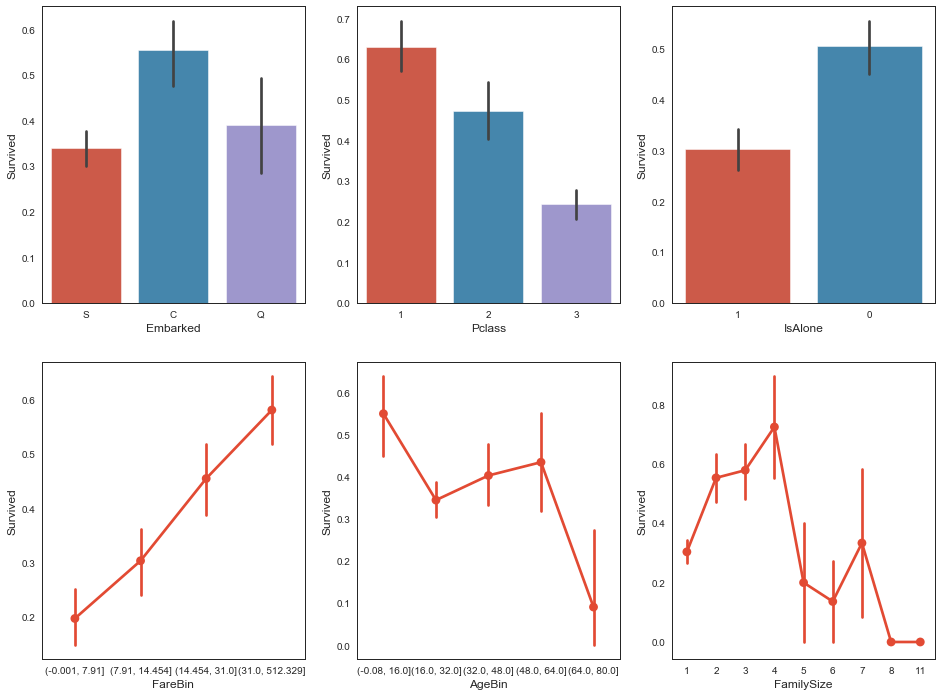

In [21]:
#we will use seaborn graphics for multi-variable comparison: https://seaborn.pydata.org/api.html
#Seabornはmatplotlib のラッパ。おしゃれな図を簡単に作れる。ラッパなので、Seaborn でできることは matplotlib でもできる。静的なグラフ (画像) を生成します。

# 次に、目的変数の値と、任意の説明変数の値との同時発生状況を、可視化している
# 「Embarked」✕「Survived」
# 「Pclass」✕「Survived」
# 「IsAlone」✕「Survived」
# 「FareBin」✕「Survived」
# 「AgeBin」✕「Survived」
# 「FamilySize」✕「Survived」

#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

# barplot(棒グラフ + 信頼区間付) 棒グラフだけならcountplotでも十分
sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
#     x,y  ：集計対象の列の名前
#     data  :グラフを作るデータ
#     order	棒の出力する順番を文字列のリストで指定。
#     ax	軸を指定。
#  表示されている黒棒は95%信頼区間（デフォルトが95%）
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])


#pointplot
sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

In [22]:
# 上段の図は、各コード値に対応する、目的地の平均値を表している
# 例えば、「Pclass=1」のレコードは「Survived」の平均が0.6超で、
# 「Pclass=3」のレコードは「Survived」の平均が0.3未満ということが分かる訳
# 2クラス分類問題の場合は、「Survived=1」の割合と考えてよい。
# バーの上端から上下に伸びている縦棒は、その平均値の信頼区間
# 描画はseabornによって行われているが、その内部にてBootstrapをDefaultで1,000実施し、
# 信頼区間を算出している。実際のところは、データ数が多いと信頼区間が狭くなり、
# データ数が少ないと信頼区間が広くなる、という感じ。或いは、平均値が大きいと信頼区間が広くなり、
# 平均値が小さいと信頼区間が狭くなる、という感じもある。


# 下段の図は、上段の図と意味は同じで、見せ方が違う形。好きな見せ方で統一して良い。
# ちなみにbarplotとpointplotの上下を入れ替えると以下のようになる

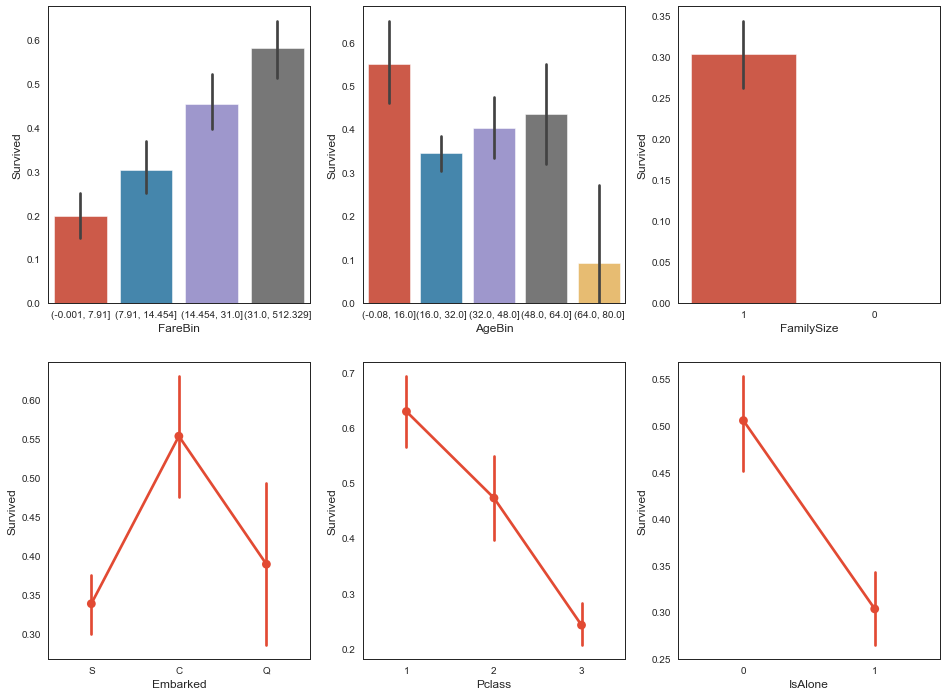

In [23]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))
sns.barplot(x = 'FareBin', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'AgeBin', y = 'Survived', data=data1, ax = saxis[0,1])
sns.barplot(x = 'FamilySize', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'Embarked', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'Pclass', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'IsAlone', y = 'Survived', data=data1, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

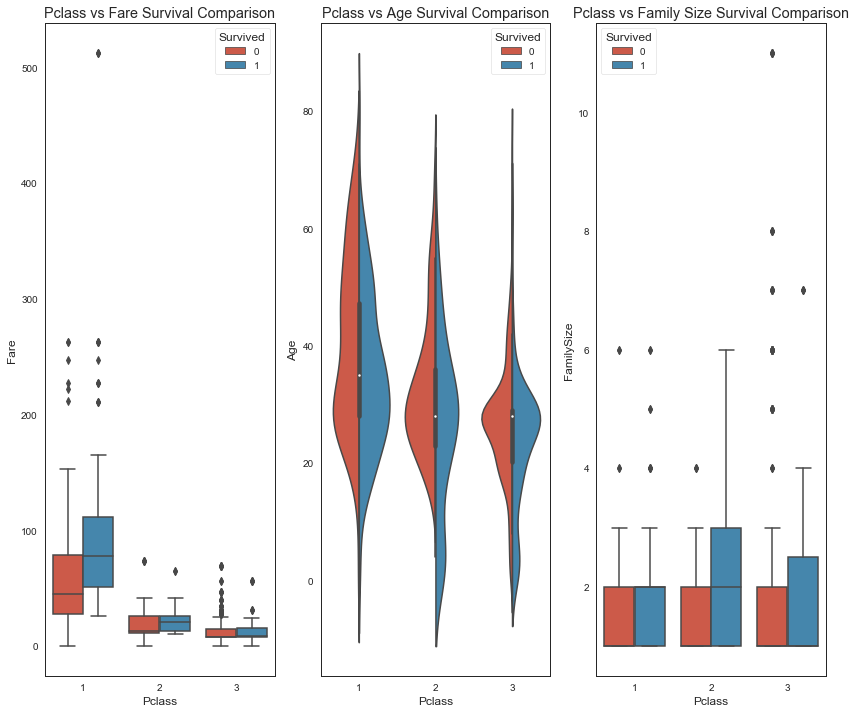

In [24]:
# 次に、以下3変数間の共起状況を見る。
# 「Pclass」✕「Fare」✕「Survived」
# 「Pclass」✕「Age」✕「Survived」
# 「Pclass」✕「FamilySize」✕「Survived」

#graph distribution of qualitative data: Pclass
# 定性データのグラフ分布: Pclass

#we know class mattered in survival, now let's compare class and a 2nd feature
# クラスが生存において重要であることがわかっているので、クラスと2つめの特徴を比較しましょう

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

#箱髭図boxplot
# hueを指定することでカテゴリ別に分けて表示できる
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

#violinplot
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

In [25]:
# 3つの図は同じ概念を表している。どれがいいかは好み
# 真ん中の図は、連続値の分布を滑らかなヒストグラムで表現しているが、
# 両端の図は、連続値の分布を箱ひげ図で表現しています。何れにせよ表現しているものは同じで
# 条件を絞ったデータにおいて、「Survived = 0 or 1」がどんな様相を示しているか、だけである

# これについても試しに見た目をShuffleしてみると、以下のようになる

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

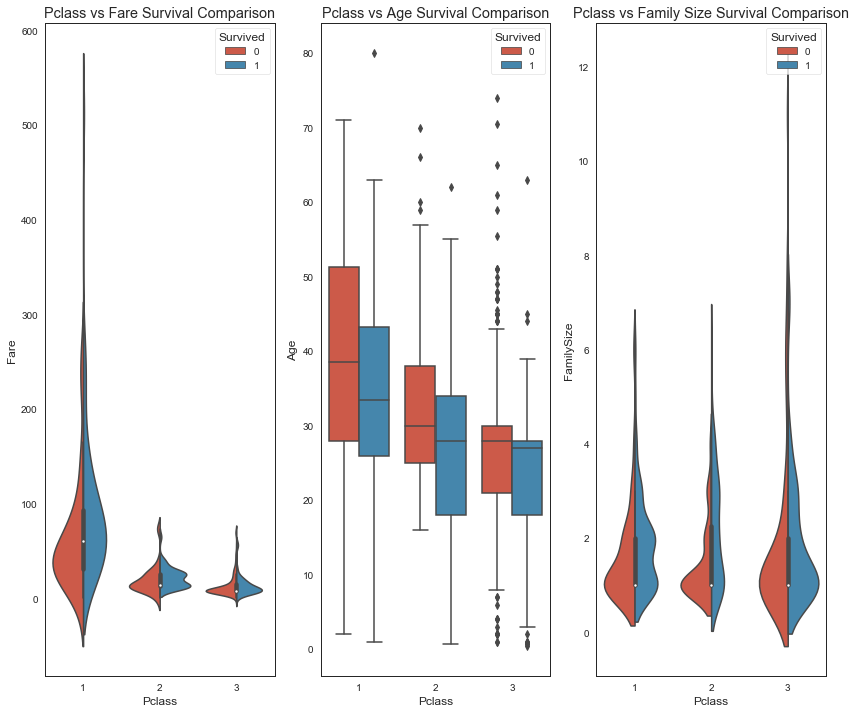

In [26]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.violinplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, split = True, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

#violinplot
sns.boxplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.violinplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, split = True, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

In [27]:
# お互いに見やすいポイント、見づらいポイントがあるので、両方出すのが本当は良いかも

Text(0.5, 1, 'Pclass vs Family Size Survival Comparison')

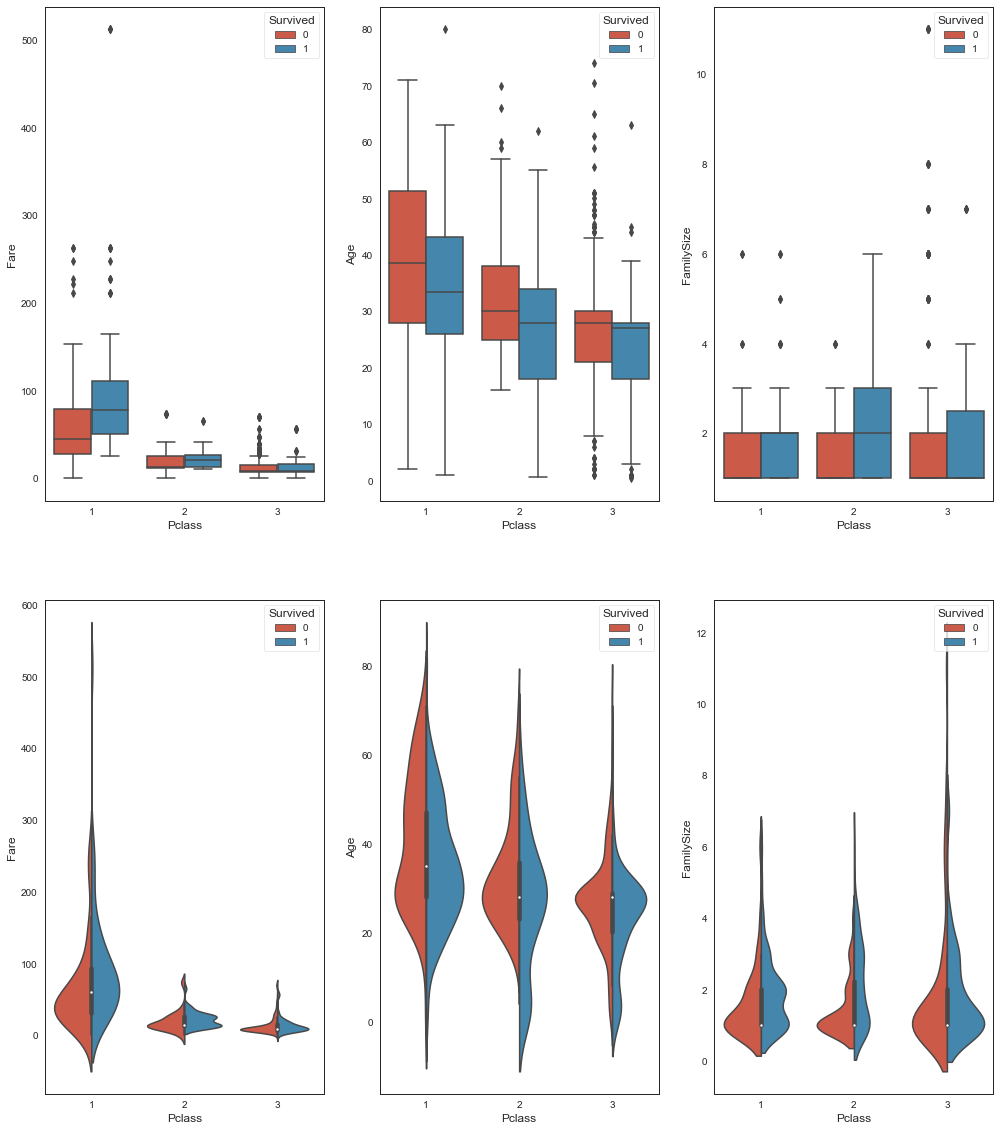

In [28]:
fig, saxis = plt.subplots(2,3,figsize=(17,20)) # figsize(横幅、高さ)

#箱髭図boxplot
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = saxis[0,0])
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.boxplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, ax = saxis[0,1])
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = saxis[0,2])
axis3.set_title('Pclass vs Family Size Survival Comparison')

#violinplot
sns.violinplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, split = True, ax = saxis[1,0])
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = saxis[1,1])
axis2.set_title('Pclass vs Age Survival Comparison')

sns.violinplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, split = True, ax = saxis[1,2])
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1, 'Sex vs IsAlone Survival Comparison')

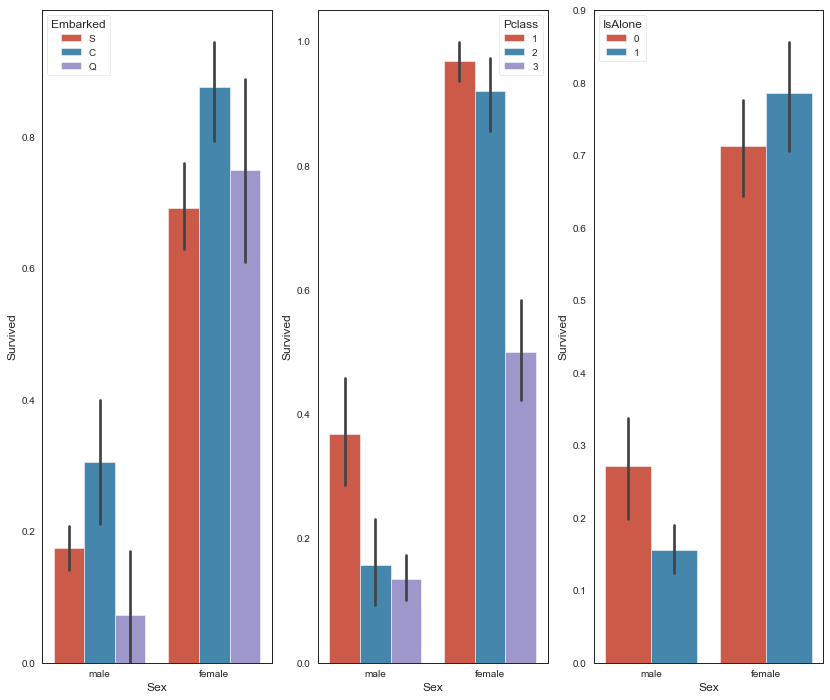

In [29]:
# 次に、以下の共起状況を見ている図の描画です。
# 「Sex」✕「Embarked」✕「Survived」
# 「Sex」✕「Pclass」✕「Survived」
# 「Sex」✕「IsAlone」✕「Survived」

#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature

fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

In [30]:
# この図のポイントは、「コード値」✕「コード値」✕「コード値」の共起を表していること。
# 2変数の同時発生性が重要である場合のインサイト発掘には、非常に役立つプロットである。


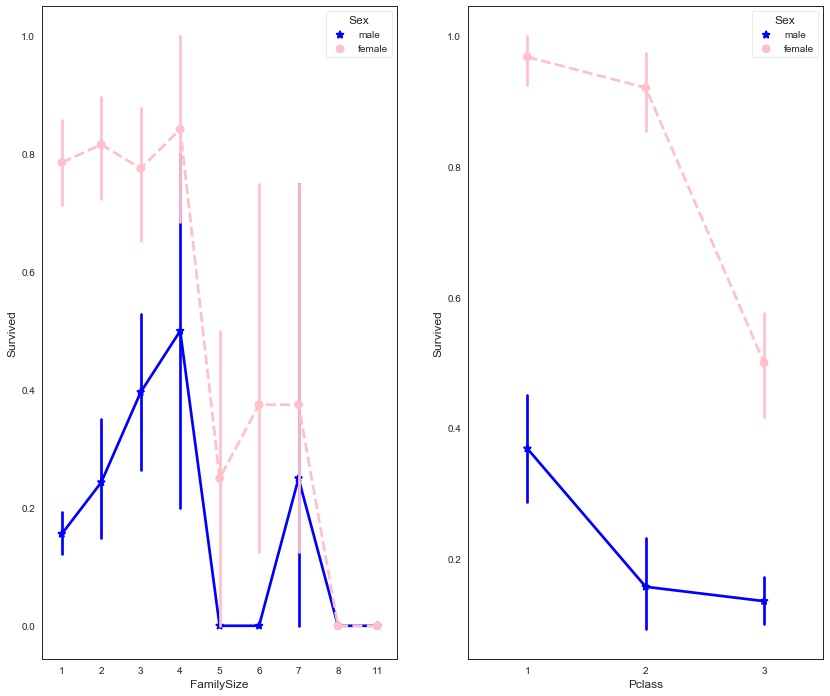

In [31]:
# 次に、以下の共起状況を見ている図の描画です。
# 「Sex」✕「FamilySize」✕「Survived」
# 「Sex」✕「Pclass」✕「Survived」

#more side-by-side comparisons
# より多くの並列比較
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
# 家族の大きさの要因と性別と生存率との比較
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
# Pclassファクターの性別と生存率の比較
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

In [32]:
# 基本的には、先程の3点共起バーグラフと同じ表現方法　
# 好みに合わせて使用するのが良さそうである

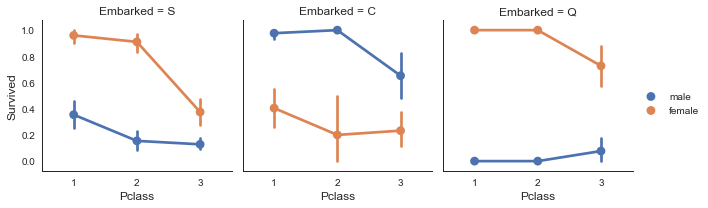

In [33]:
# 次に、以下の4点共起表現（4点とまで行くと、その図を見る人の脳みそ負荷が大分大きくなってくる…。）
# 「Sex」✕「Pclass」✕「Embarked」✕「Survived」

#how does embark port factor with class, sex, and survival compare
# クラス、性別、生存率とポートファクターをどのように比較するか
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

In [34]:
# 実際には、3点共起の図を、条件別に出している感じ。
# この考え方を適用すれば、現実的には何点共起まででも、表現ができそう。

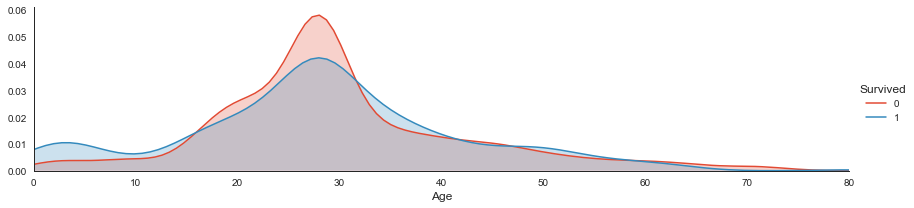

In [35]:
# 次に、連続値「Age」についての存在確率分布を、「Survived = 0 or 1」別に表示している図

#plot distributions of age of passengers who survived or did not survive
# 生き残った、または生き延びなかった乗客の年齢の分布をプロットする

a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 ) 
a.map(sns.kdeplot, 'Age', shade= True ) #純粋なカーネル密度推定法（KDE)のプロットをする。
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

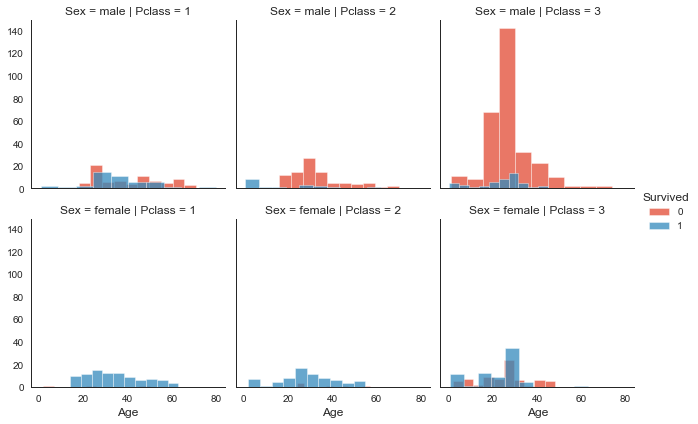

In [36]:
# 次に、以下の4点共起状態の可視化
# 「Sex」✕「Pclass」✕「Age」✕「Survived」

#histogram comparison of sex, class, and age by survival

h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

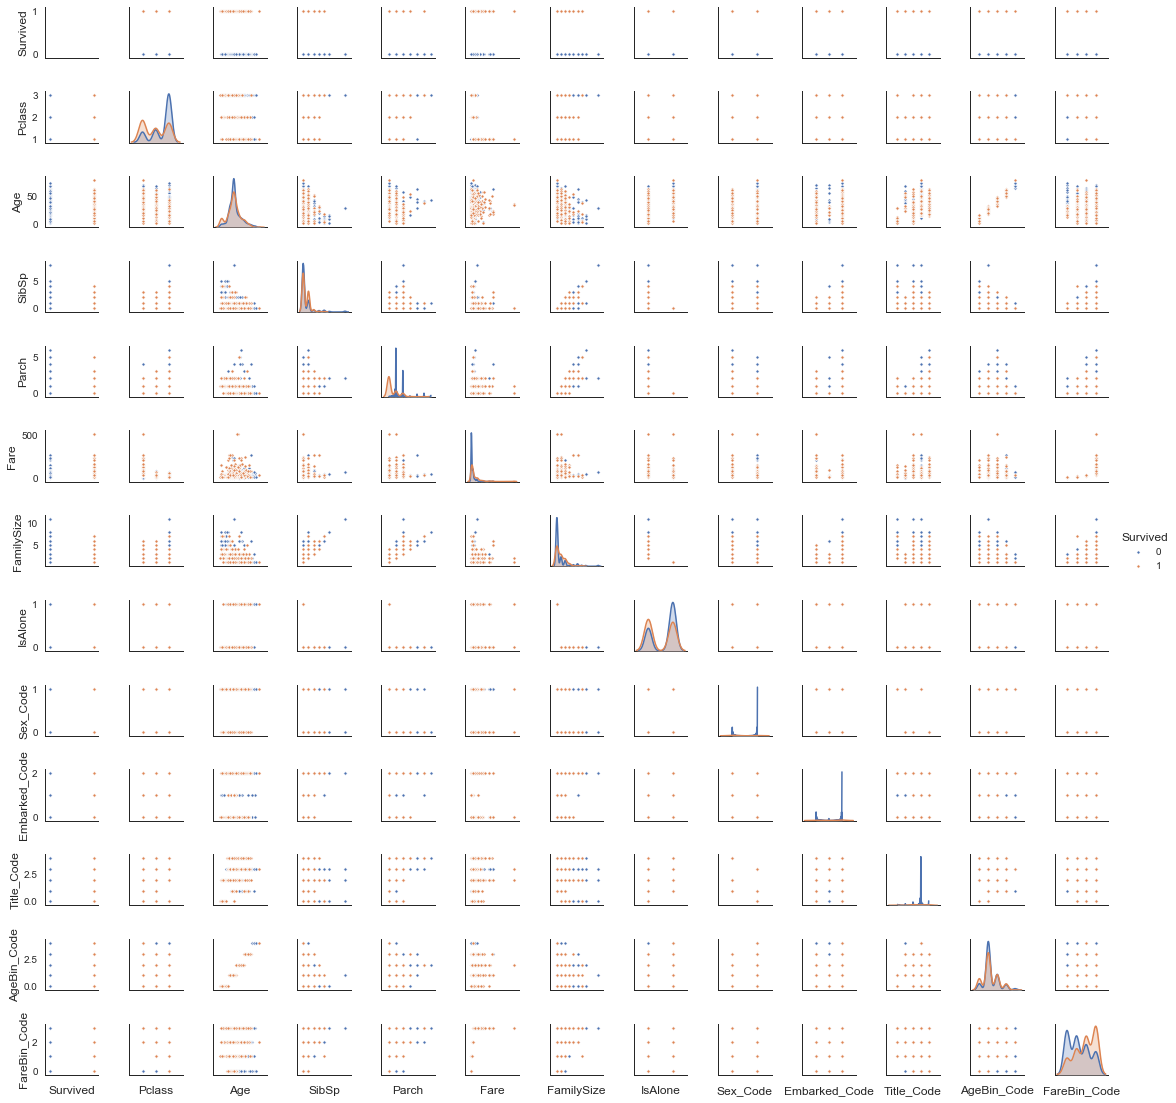

In [37]:
# 次に、ペアプロット

#pair plots of entire dataset
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

In [38]:
# これは、ちょっと見づらい

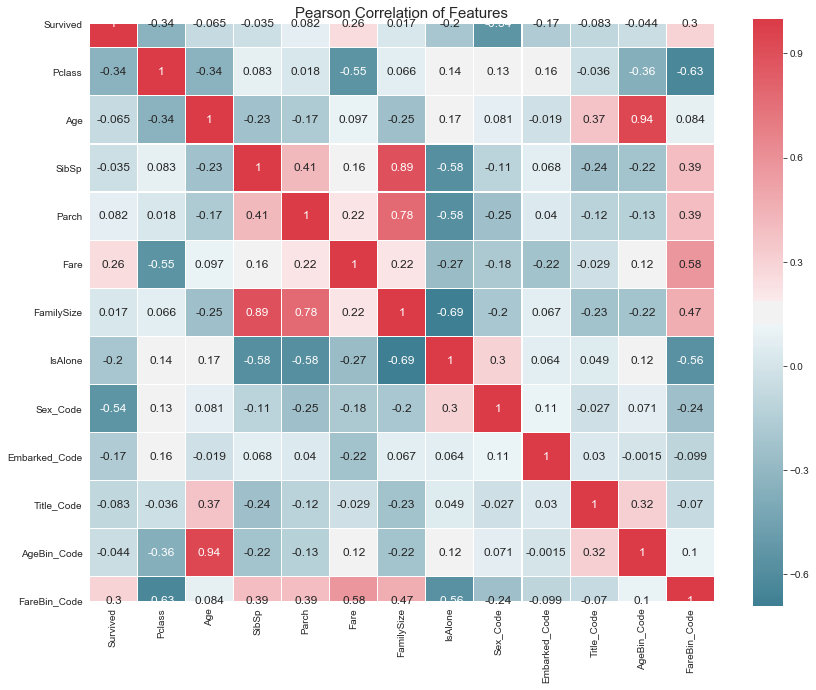

In [39]:
# 次に、相関分析Heatmap

#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

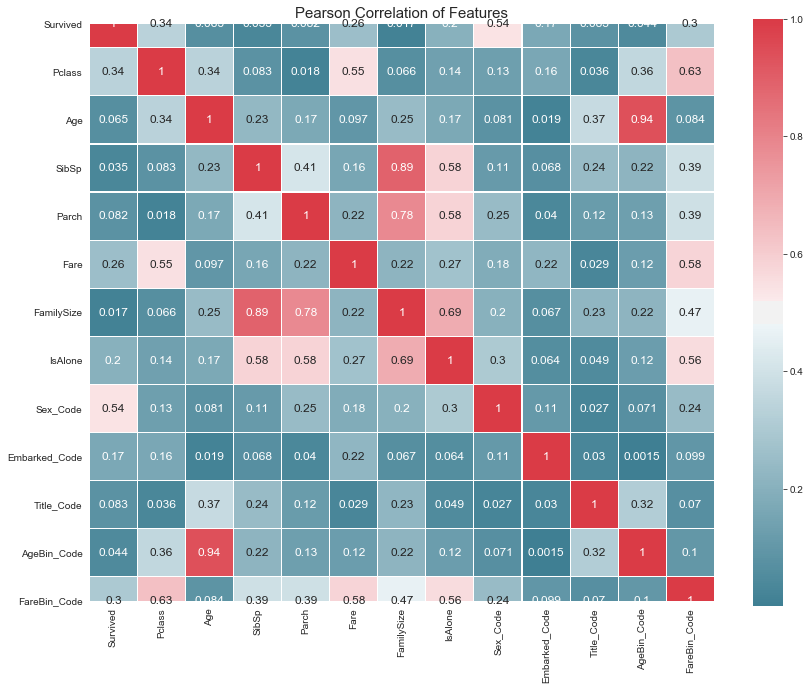

In [40]:
# 相関分析は、流儀によっては、絶対値だけで見る人もいる。
# それは、「df.corr()」の後ろに「df.corr().abs()」と添えれば実現できる
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr().abs(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

In [41]:
# 相関の有無だけを見たいのであれば、絶対値表現の方が明瞭
# と、ここまでで、「Step 4: Perform Exploratory Analysis with Statistics」が終了。

##  再褐



# Step 1: Define the Problem（課題設定をする）  
- 課題：「Titanic沈没時の生存結果を予測するアルゴリズムの開発」


# Step 2: Gather the Data（データ収集）
- データ収集方法：KaggleからDownloadする。
   
  
KaggleではStep1,2は済んでいるので、3から行う


# Step 3: Prepare Data for Consumption（前処理を行う）  
- 3.1 Import Libraries（必要なライブラリのインポート）
- 3.2 Meet and Greet Data (データとの交流)
- 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting
       (Correcting：異常値と外れ値への対策, Completing：欠損値の補完, Creating：分析のための新特徴生成, Converting：機械学習の入力とするための数値化)
- 3.22 Clean Data（データの整形）


　　　
# Step 4: Perform Exploratory Analysis with Statistics（統計による探索的分析の実行）

全ての変数が密に数値化されたため、ここから先は以下を実施すると記述されています。   
・グラフィカル統計にてデータを調べ、変数の説明・要約を実施   
・説明変数、目的変数間の相関関係を調査


## 次ここから↓

# Step 5: Model Data（データをモデリングする）

さて、データの準備ができたところで、いよいよ機械学習の適用。
尚、Freemanさんは、このChapter冒頭、以下ポイントを語っている。


・Data Scienceは、「mathematics」「computer science」「business management」の間の学際的分野  
・殆どの人が、何れかの分野に寄りかかる傾向がある   
・上記3つは、3本のスツールのようなもので、どれが欠けてもよろしくない   
・数学の知識については、一先ずは「高レベルな概要」で大丈夫   
・問題を捉えるビジネス的な洞察力が必要    
・結局のところ、盲導犬のトレーニングのように、我々から学ぶことであり、その逆ではない    
・エントリの障壁が低くなると、使用ツールへの理解が低くなり、誤った結論が出る可能性があり、最悪の場合はプロジェクトの完成を不可能にする   
・kernelを通して学ぶ重要なことは、何をするのかよりも、何故するのかである   
・強化学習は、教師あり学習と、教師なし学習のハイブリッド（モデルはすぐに正しい答えを与えられるのではなく、一連のイベントの後に与えられる）   
・ロジスティック回帰は名前に回帰がありますが、実際は分類アルゴリズムです   
  
前の説明でFreemanさんは「機械学習は、魔法の杖や銀の弾丸ではない」とも言っていました。ここでは、その点について、もう少し掘下げています。   
  
   
そして、Freemanさんは更に、「Data Science 101：How to Choose a Machine Learning Algorithm (MLA)」と題して、以下のポイントも語っています。（「101」は、「初級編・入門者向けの・基礎編」という意味）   
・データモデリングについては、最良のアルゴリズムを事前に推し量ることができないという「No Free Lunch Theorem」が存在、全てのデータセットに機能するスーパーアルゴリズムはない   
・複数の機械学習手法を試して、精度比較するのが良い   
・データ量がものを言う派や、アルゴリズムがものを言う派がいる   
・決定木、Random Forest、Boostingが初心者にはオススメ   
・決定木は特に、直感的に理解が容易い    
以上。なるほど、Try&Error的に複数のモデルを試してみることが大事だということですね.   
研究という感じですね。決定木系のアルゴリズムを使った方が良いというのは分かる気がしますね。回帰分析を元としたアルゴリズムは、ベースの考え方が確かに結構難しいですからね。   


In [42]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.829478,0.0527546,0.036599
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.826119,0.0453876,0.036503
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.835768,0.822761,0.0493681,0.0416908
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.866667,0.822015,0.0529916,0.0634054
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.821642,0.0610665,0.00439916
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.891011,0.81791,0.0921453,0.0158967
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.817537,0.069808,0.0114
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0690863,0.00300009
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820412,0.81194,0.0498606,0.0559059
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.891011,0.811194,0.0575595,0.0114005


In [43]:
# XGBoostがテストデータにて性能がTOP、という結果になりました。
# 尚、補足ですが、私の環境ですと、XGBoostの学習処理の前に「os.environ[‘KMP_DUPLICATE_LIB_OK’]=’True’ # for XGBoost」というコードを実施しておかないと、処理が落ちてしまうようでした。Jupyterが
# 上記、表出力の結果ですが、以下のコードで直感的に描画されます。

Text(0, 0.5, 'Algorithm')

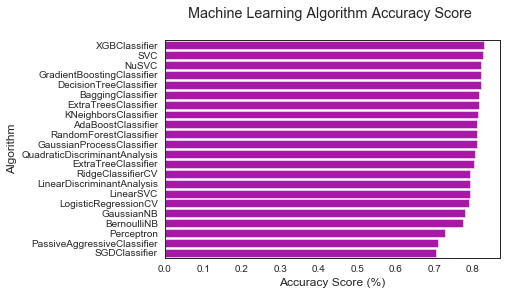

In [44]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

Evaluate Model Performance（モデル性能を評価する）


ここまでで、乗客の生存を約82%で予測できました。ここから先の作業について、Freemanさんは以下のように語っております。  
・先ず、これまでの結果で、悪くはなかろう  
・ここから先は、あなたが研究職でない限りは、ROI（投資収益率）を考えなくてはならない  
・例えば、3ヶ月で0.1%の精度向上は、ビジネス的にはよろしくない    
・モデル改良をする時は、それを肝に命じる    
とのことです。言いたいことはよく分かりますね。要するには、QCDという観点です。  
QCDは、Quality・Cost・Deliveryのバランス担保の話です。Quality Firstは勿論ですが、  
それに対するCostやDeliveryが、あまりにも見合わない場合はビジネスとして上手くありません。  
その点を気を付けろということを、Freemanさんは言ってくれています。  
そして、ここで「Data Science 101: Determine a Baseline Accuracy」と題して、以下説明をしてくれています。  
・2クラス問題であり、かつ、「Survived = 0」の数が1,502/2,224であることを我々は知っている為、  
最低精度は全てのデータを「Survived = 0」と予測した際の、67.5%である  
・ベースラインとする精度は、0%でもなく、50%でもなく、68%としよう  
確かに、仰る通りですね。不均衡データの場合は、更にその傾向が出ます。ちなみに、注意が必要なのは、  
上記の「1,502/2,224」という数は、データからの数字ではなく、wikiなどに載っている実際の結果です。  
  
  
  
続けて「Data Science 101: How-to Create Your Own Model」と題し、以下の説明をしてくれています。  
更に精度が向上するかどうかを検証するためには、データに対して、例えば、以下のような直感に基づいて  、
手動で決定木を作ってみると良い。Excelでの実施も良いでしょう。  
  
無頼で作ったその決定木の精度を5段階評価「worst, bad, good, better, best」のgoodと置き、  
そこをベースに議論をすることで、機械が求めた予測器の精度の妥当性が分かります。  
少なくとも手動のものよりは良い筈です。また、何をどうすれば精度が出るかを考えるプロセスを経ることで、  
機械学習にて行われている内容への理解も深まります。  
（※結構、個人的な解釈を加えています…。）  
  
Question 1：あなたはタイタニック号に乗っていましたか？  
→ YESであれば、学習データの「Survived = 0 or 1」比率から、  
少なくとも62%の精度が出せる（学習データの「Survived = 0 or 1」は「549（62%）：342（38%）」という比率）  
Question 2：あなたは男性ですか？女性ですか？  
→ 学習データにおいて、男性で死亡した人は81%、女性の生存した人は74%である為、その情報から、  
男性比率65%✕81%＋女性比率35%✕74%=79%の精度は少なくとも出せる  
Question 3A：女性である人の内、乗客クラス（Pclass）は1,2,3の何れですか？  
→ 学習データ上、乗客クラス1の人は97%が生存し、乗客クラス2の人は92%が生存しており死亡者は10人以下、  
かつ、乗客クラス3は生存者と死亡者が50-50である為、このQuestionによる精度向上は無かった  
Question 4A：女性である、かつ、乗客クラス（Pclass）が3である人の内、出港地（Embarked）はC,Q,Sの何れですか？  
→ 出港地がC,Qの人は大多数が生存した為、それによる精度向上は無いが、出港地がSの人は63%が死亡した為、  
その分岐によって精度が81%に向上する  
Question 5A：女性である、かつ、乗客クラス（Pclass）が3である、かつ、出港地（Embarked）がSである人の内、…  
→ この質問から先は、色々試して遊んでみると、運賃0-8で大多数が生き残るという分岐を作ることができ、  
精度を82%に向上することができる  
Question 3B：男性の内、…  
→ 男性側には、女性に見られるような、以降の条件による効果的な分岐が見当たらなかった  
なるほど、ここの部分はメチャクチャ示唆に富んでます…。神です…。私の知っている限りでも、  
「機械学習にかける→XX%の精度が出た→XX%の精度が限界である」というように、  
淡白に結論に至るData Scientistは少なくありません。それは、Scienceではなく、ツール利用ではないかという…。  
Data Scientistたるもの、全てのプロセスに対するWhyを説明することが理想だと思いますが、  
Freemanさんはその辺りをちゃんと伝えようとしれくれています。  
そして、実際に手作りのモデルをスクラッチでコーディングしてくれています。  
そして、上記の御手製決定木の前段として、先ず、完全ランダム予測の「Coin Flip Model」を紹介しています。  
以下がそのコードです。  

In [45]:
#IMPORTANT: This is a handmade model for learning purposes only.
# ！重要　これは勉強用のためだけのスクラッチのモデル

#However, it is possible to create your own predictive model without a fancy algorithm :)
# しかし、派手なアルゴリズムなしで独自の予測モデルを作成することが可能です

#coin flip model with random 1/survived 0/died

#iterate over dataFrame rows as (index, Series) pairs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html
for index, row in data1.iterrows(): 
    #random number generator: https://docs.python.org/2/library/random.html
    if random.random() > .5:     # Random float x, 0.0 <= x < 1.0    
        data1.set_value(index, 'Random_Predict', 1) #predict survived/1
    else: 
        data1.set_value(index, 'Random_Predict', 0) #predict died/0
# 1つのカラムを追加した    

#score random guess of survival. Use shortcut 1 = Right Guess and 0 = Wrong Guess
#the mean of the column will then equal the accuracy
data1['Random_Score'] = 0 #assume prediction wrong
# Survived == Random_Predictが一致するものにはRandomScoreに1をいれる
data1.loc[(data1['Survived'] == data1['Random_Predict']), 'Random_Score'] = 1 #set to 1 for correct prediction
print('Coin Flip Model Accuracy: {:.2f}%'.format(data1['Random_Score'].mean()*100))

#we can also use scikit's accuracy_score function to save us a few lines of code
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(data1['Survived'], data1['Random_Predict'])*100))

Coin Flip Model Accuracy: 50.84%
Coin Flip Model Accuracy w/SciKit: 50.84%


In [46]:
# 「Coin Flip Model」は全ての予測を、Randomに「0 or 1」で決めるというモデル。
# 0側にも1側にも偏ることなくRandomに決めます。私も昔、テスト回答を鉛筆転がして決めたことがありますが、
# それと一緒ですね。

In [47]:
data1.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,...,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code,Random_Predict,Random_Score
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S,1,...,Misc,"(7.91, 14.454]","(16.0, 32.0]",1,2,1,1,1,0.0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S,1,...,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,2,2,1,2,0.0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.45,S,4,...,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,2,2,1,2,0.0,1
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,1,...,Mr,"(14.454, 31.0]","(16.0, 32.0]",1,0,3,1,2,1.0,1
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q,1,...,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,1,3,1,0,1.0,0


In [48]:
# 上記プログラムの結果は、正解率50%です。私の手元で、上記プログラムを1,000回施行してみましたが、
# 都度都度は正解率が少し上下するものの、その平均を取ると50%（正確には、49.963%）となりました。
# 予測1つ1つの正解率の期待値が50%な訳ですから、それを複数データ分実施しても、正解率の期待値は変わらず50%ですよね。


In [49]:

#group by or pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
pivot_female = data1[data1.Sex=='female'].groupby(['Sex','Pclass', 'Embarked','FareBin'])['Survived'].mean()
print('Survival Decision Tree w/Female Node: \n',pivot_female)

pivot_male = data1[data1.Sex=='male'].groupby(['Sex','Title'])['Survived'].mean()
print('\n\nSurvival Decision Tree w/Male Node: \n',pivot_male)

Survival Decision Tree w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]          NaN
                          (31.0, 512.329]    1.000000
                S         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN


In [50]:
#handmade data model using brain power (and Microsoft Excel Pivot Tables for quick calculations)
# 次に、御手製決定木のスクラッチコーディングです。コードは以下です。
def mytree(df):
    
    #initialize table to store predictions
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master'] #survived titles

    for index, row in df.iterrows():

        #Question 1: Were you on the Titanic; majority died
        # 問１：タイタニックに載っていたか？→乗っていた人の方が確率が高い
        Model.loc[index, 'Predict'] = 0

        #Question 2: Are you female; majority survived
        # 問２：女性かどうか？→女性の方が生存率が高い
        if (df.loc[index, 'Sex'] == 'female'):
                  Model.loc[index, 'Predict'] = 1

        #Question 3A Female - Class and Question 4 Embarked gain minimum information

        #Question 5B Female - FareBin; set anything less than .5 in female node decision tree back to 0       
        if ((df.loc[index, 'Sex'] == 'female') & 
            (df.loc[index, 'Pclass'] == 3) & 
            (df.loc[index, 'Embarked'] == 'S')  &
            (df.loc[index, 'Fare'] > 8)

           ):
                  Model.loc[index, 'Predict'] = 0

        #Question 3B Male: Title; set anything greater than .5 to 1 for majority survived
        if ((df.loc[index, 'Sex'] == 'male') &
            (df.loc[index, 'Title'] in male_title)
            ):
            Model.loc[index, 'Predict'] = 1
        
        
    return Model


#model data
Tree_Predict = mytree(data1)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(data1['Survived'], Tree_Predict)*100))


#Accuracy Summary Report with http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
#Where recall score = (true positives)/(true positive + false negative) w/1 being best:http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
#And F1 score = weighted average of precision and recall w/1 being best: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
print(metrics.classification_report(data1['Survived'], Tree_Predict))

Decision Tree Model Accuracy/Precision Score: 82.04%

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.68      0.75       342

   micro avg       0.82      0.82      0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.82       891



In [51]:
# 正解率が「Score」になりますが、82.04%となっています。事前にFreemanさんが調べていた通りです。



# コードの説明
#classification_reportとは
# 以下sklearnの公式ドキュメントからの抜粋ですが、
# 簡単に言うと予測ラベルと正解ラベルからprecision,recall,f1-scoreを算出しまとめてくれる機能です。

from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

   micro avg       0.60      0.60      0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [52]:
# 予測結果の評価尺度

# 正解率 (精度, accuracy)：正や負と予測したデータのうち，実際にそうであるものの割合
# 適合率 (precision)：正と予測したデータのうち，実際に正であるものの割合
# 再現率 (recall, 感度, sensitivity)：実際に正であるもののうち，正であると予測されたものの割合
# 特異度 (specificity)：実際に負であるもののうち，負であると予測されたものの割合
# F値 (F尺度, F-measure, f1-score)：精度と再現率の調和平均．

In [53]:
# 次に、結果をサマリするコードです。

Confusion matrix, without normalization
[[497  52]
 [108 234]]
i: 0, j: 0
i: 0, j: 1
i: 1, j: 0
i: 1, j: 1
Normalized confusion matrix
[[0.91 0.09]
 [0.32 0.68]]
i: 0, j: 0
i: 0, j: 1
i: 1, j: 0
i: 1, j: 1


<Figure size 432x288 with 0 Axes>

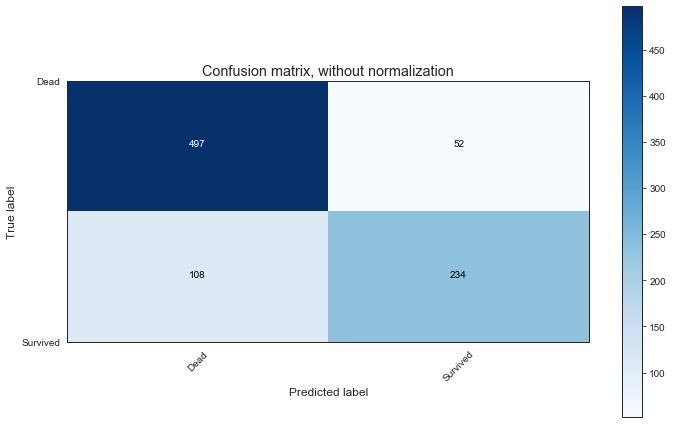

<Figure size 432x288 with 0 Axes>

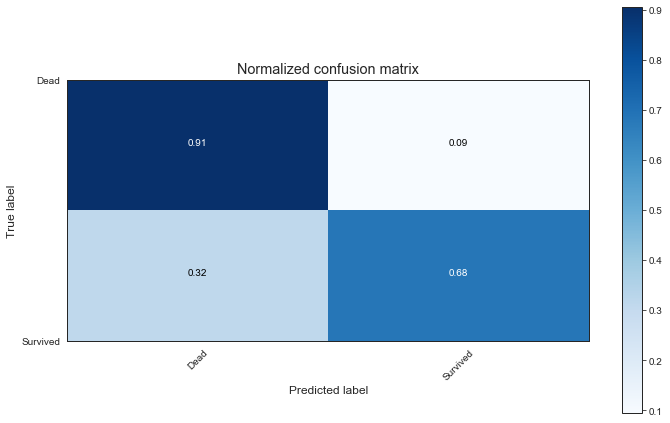

In [54]:
#Plot Accuracy Summary
#Credit: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # 混同行列（confusion matrix）を表示する.詳しい説明は↓
    # https://qiita.com/TsutomuNakamura/items/a1a6a02cb9bb0dcbb37f
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)# 混同行列を出力する

    # 以下でビジュアルを生成
    plt.figure(figsize=(10,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
        # 画像を拡大や回転する場合など、画像の画素と画素の間の輝度値を参照する必要が出てきますが、
        # その参照方法を紹介します。
        # この画素を画素の間を参照する事を一般に補間や内挿（Interpolation）と言います。
        # interpolation='nearest' は
        # 最近傍補間（ニアレストネイバー　Nearest neighbor）
        # 最も近いご近所、という事で参照する位置に最も近い位置にある画素の輝度値を参照します。詳細↓
        # http://imagingsolution.blog.fc2.com/blog-entry-142.html 
        # cmap: color mapのこと、色を指定
    plt.title(title) #タイトル
    plt.colorbar() # カラーバーの表示
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45) #x軸のパラメータ設定(ticks(数値配列), labels（ラベル名）, ...)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # itertools.product(arr1, arr2) で直積のイテレータを生成する
        print("i:",i,end="")
        print(", j:", j)
        if i ==1: #テキストの位置調整
            y = 0.75
        else:
            y = 0.25
        x = j
        plt.text(x, y, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(data1['Survived'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix
# 正規化しないまま混同行列を作る
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# 正規化して混同行列を作る
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')

In [64]:
# 上記結果を見ると、「Survived ＝ 0」と予測して、実際に「Survived ＝ 0」だった場合の正解率が91%と高く、
# 「Survived ＝ 1」と予測して、実際に「Survived ＝ 1」だった場合の正解率がそれに劣る68%であることが分かります。
# 尚、上記の精度は、学習データとテストデータに分割することなく導出した精度です。
# クロスバリデーションも実施していません。
# ちなみに、前Chapterの「Chapter 7 — Step 5: Model Data」にて、出された精度は
# クロスバリデーションを行って出した精度でした。
# Freemanさんはその点について、ここで触れています。
# ・前Chapterの「Chapter 7 — Step 5: Model Data」では、sklearnのcross_validate関数を使い、
# 　モデルのパフォーマンスをトレーニング、テストに分けて評価していた
# ・モデル構築には、学習データとテストデータの分けが非常に重要である
# ・機械学習は、既に見たことのあるデータを「予測する」のは得意だが、見たことのないデータについては保証がなく
# 　（ひどいことになるかも）、保証がないということは、汎用的な意味での「予測」になっていないことになる
# ・Cross Validationは、複数回分割したデータにて、別々にモデルを作り、それ毎に精度評価を行うことで、
# 　未知のデータに対する精度を見積もるものである（誤った自信を持たないために重要）
# ・私が行っているCross Validationは、「customized sklearn train test splitter」である

## Tune Model with Hyper-Parameters（ハイパーパラメータによってモデルをチューニングする）

次に、ハイパーパラメータチューニングのChapterになります。この章の冒頭、Freemanさんは以下のように語っております。  
・前Chapterの「Chapter 7 — Step 5: Model Data」にて、sklearnのDecisionTreeClassifierは、Defaultのハイパーパラメータにて学習を行った為、パラメータチューニングの余地が残っている  
・パラメータのチューニングをする際には、その意味を理解している必要がある為、決定木のアルゴリズムについて、ここでもう少し解説する  
ハイパーパラメータとは、機械学習アルゴリズムの挙動を制御するパラメータのことです。また、「No Free Lunch Theorem」は、ハイパーパラメータについても、それが言えます。「No Free Lunch Theorem」とは、実際にやってみるまで、精度が高くなるアルゴリズムが推定できないことです。ハイパーパラメータについても、精度が最も高くなるポイントは、事前に推定することができないのです。その為、精度追求のためには、Trial&Error的に色々なパラメータを試す必要があります。  
そして、決定木の説明を以下のようにされています。メリット・デメリットを軸にした話ですね。  
決定木のメリットは以下の通り  
・理解しやすく、解釈しやすい  
・値の大小スケールを調整する必要が無い  
・sklearnの決定木は、欠損値をサポートしていないので、フォローする必要がある  
・予測の法則性がホワイトボックスである（条件の分岐で説明できる）  
決定木のデメリットは以下の通り  
・木の数（或いは、木の深さ）を増やし過ぎると、オーバーフィットする  
・オーバーフィットを防ぐための「枝刈り」は、sklearnではフォローされていない  
・「枝刈り」以外にもオーバーフィット対策は幾つか存在し、sklearnにはそれらの内の主要なものが実装されている  
・局所的に最適な境界を求めるような発見的、かつ、貪欲なアルゴリズムである為、Globalにロバストである保証はない（外挿に弱い）  
・データのわずかな変動に対する過敏反応や、Globalにロバストである保証がない点は、アンサンブル（要は、Random Forestにする）で軽減でき得る  
・学習データにおけるクラス別データ数に偏りがあると、データ数が多いクラスが優勢に作られる（データ数の多いクラスばかりを、予測しがちになる）ので、学習前にバランスを取っておくと良い  
なるほど、確かに仰る通りですね。  

In [65]:
# そして、決定木のパラメータを調整した上での学習実施、及び、精度測定のコードを以下のように記載されています。


#base model
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv  = cv_split)
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

#print(list(model_selection.ParameterGrid(param_grid)))

#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(data1[data1_x_bin], data1[Target])

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


#duplicates gridsearchcv
#tune_results = model_selection.cross_validate(tune_model, data1[data1_x_bin], data1[Target], cv  = cv_split)

#print('AFTER DT Parameters: ', tune_model.best_params_)
#print("AFTER DT Training w/bin set score mean: {:.2f}". format(tune_results['train_score'].mean()*100)) 
#print("AFTER DT Test w/bin set score mean: {:.2f}". format(tune_results['test_score'].mean()*100))
#print("AFTER DT Test w/bin set score min: {:.2f}". format(tune_results['test_score'].min()*100))
#print('-'*10)


BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*std: +/- 5.57
----------
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.35
AFTER DT Test w/bin score mean: 87.40
AFTER DT Test w/bin score 3*std: +/- 5.00
----------


In [66]:
# グリッドサーチにて、パラメータのチューニングを行った結果、Cross Validation 10回における、
# テストデータでの平均正解率が、なんと87.40%となりました。人間の主観による82.04%が、結構突き放されています。
# また、Cross Validationにて複数回精度検証を行っていることを利用して、正解率の±3σ値も出してくれています。
# これは、面白い表現ですね！

## Tune Model with Feature Selection（特徴選択によるモデルのチューニング）


ここで特徴選択というワードが出てきます。特徴選択について、Freemanさんは以下のように触れています  
・より多くの特徴（次元数の多い説明変数）から作るモデルは、過学習している危険性がある  
・それを防ぐためのデータモデリングのもう1ステップとして、特徴選択がある  
・Sklearnには幾つかの特徴選択機能が用意されているが、ここではCross Validationと共にRFE（Recursive Feature Elimination）を使用する  
  
ここで、特徴選択について補足をします。特徴選択とは、予測精度の向上に寄与しない特徴を削るアプローチです。それにより、一般的にテストデータでの予測精度向上が見込めます   


特徴選択を、Freemanさんは以下コードにて行っています。特徴選択手法としては、RFEを適用しています。  
RFEは、「特徴の重要度算出」と「低重要度の特徴の削除」を繰り返す手法です。上記図のように1つずつ削る場合もあれば、5個ずつ・10個ずつなど、一気に削る場合もあります。Freemanさんの場合は、「step=1」と設定しているので、特徴を1つずつ削っている形です。

In [67]:
#base model
print('BEFORE DT RFE Training Shape Old: ', data1[data1_x_bin].shape) 
print('BEFORE DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)



#feature selection
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(data1[data1_x_bin], data1[Target])

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target], cv  = cv_split)

#print(dtree_rfe.grid_scores_)
print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)


#tune rfe model
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
rfe_tune_model.fit(data1[X_rfe], data1[Target])

#print(rfe_tune_model.cv_results_.keys())
#print(rfe_tune_model.cv_results_['params'])
print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT RFE Training Shape Old:  (891, 7)
BEFORE DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51
BEFORE DT RFE Test w/bin score mean: 82.09
BEFORE DT RFE Test w/bin score 3*std: +/- 5.57
----------
AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code'
 'FareBin_Code']
AFTER DT RFE Training w/bin score mean: 88.16
AFTER DT RFE Test w/bin score mean: 83.06
AFTER DT RFE Test w/bin score 3*std: +/- 6.22
----------
AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.39
AFTER DT RFE Tuned Test w/bin score mean: 87.34
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.21
----------


In [68]:
# パラメータチューニングによって、87.40%まで向上した精度が、特徴選択によって87.34となりました。
# 少し、精度が低下してしまいました。しかし、特筆すべきは、使用している特徴の数が、
# 7から6へと減少していることです。何かを判定するための予測機を作るとして、それを実運用する場合、
# 特徴選択によって精度が向上、または、そう変わらずにStayする場合には、少ない特徴で運用ができる訳ですから、
# 運用コストの面で嬉しさがあります。
# また、Titanicデータセットは、元々の特徴数が割と少ないので、上記結果程度の特徴数削減しかできませんでしたが、
# 実際のデータ分析においては、データがもっと多数に及ぶことが多く、
# 特徴数の削減が1/10、1/100といったスケールで実現できることもあります。
# 尚、私の手元にて、もっと細かくパラメータチューニングをしてみたところ、
# RFE前で87.62%、RFE後で87.60%となりました。少しだけの精度向上ですね。

In [69]:
# そして、この後、Freemanさんは作成した決定木のグラフを可視化しています。可視化のためのコードは以下です。

In [70]:
#Graph MLA version of Decision Tree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names = data1_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## Step 6: Validate and Implement（評価と改善）

次に、テストデータにて、複数の機械学習アルゴリズムを組み合わせるVotingというものをFreemanさんは実施しています。  
複数アルゴリズムによる予測結果の平均を取ったり、それらの多数決によって予測結果を決定したりする方法です。  
その実施を検討するに当たって、先ず、各アルゴリズムの予測結果の相関を観察します  



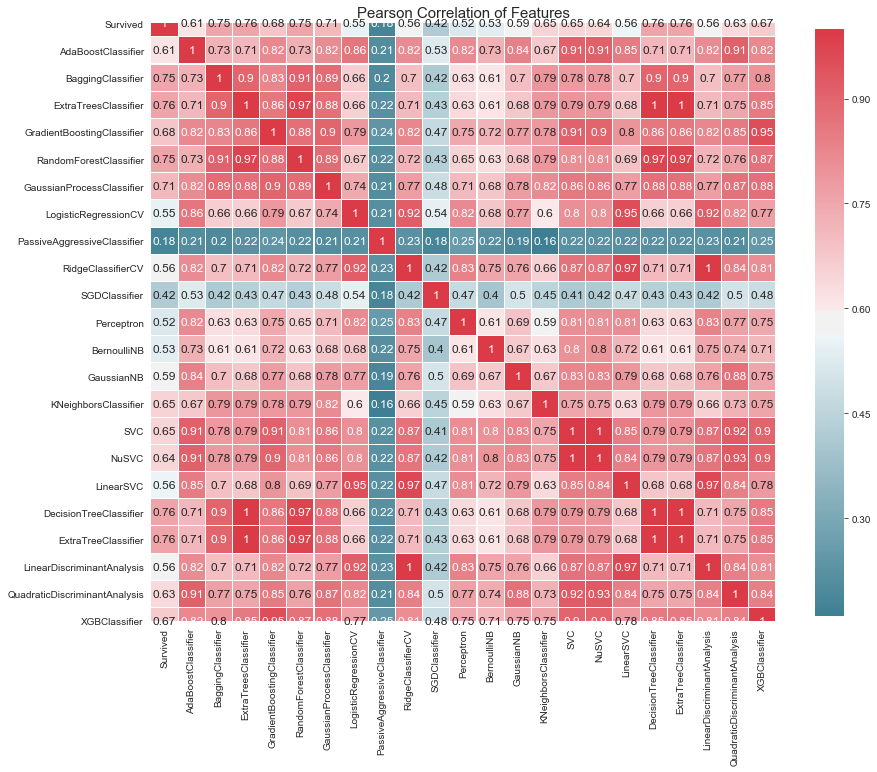

In [71]:
#compare algorithm predictions with each other, where 1 = exactly similar and 0 = exactly opposite
# 各アルゴリズムの予測結果を互いに比較します。ここで、1は「予測結果が完全に類似している」という意味で、
# 0は「予測結果が完全に反転している」という意味です。）

#there are some 1's, but enough blues and light reds to create a "super algorithm" by combining them
# 図の上で、薄い赤色や、青色であるアルゴリズムのペアは、それらを組み合わせることにより
# 「スーパーアルゴリズム」を作成する）

correlation_heatmap(MLA_predict)

In [72]:
# このマトリックスは、対角のAll 1のラインを軸に、対象となっています。
# 一番左の列、及び、一番上の行が、実際の答えと、各アルゴリズムの予測値との相関値を表している為、
# そこに高い数値が記載されているアルゴリズムが、単体での発揮精度が高いアルゴリズムとなります。
# また、各アルゴリズム間での相関値が低いペアについては、同一データに対して異なる予測を行っているということですので、
# ensembleすると良い結果を生む可能性があります。


# その発想から、Freemanさんはこの後、以下のアルゴリズムを組合せたensembleを実施しています。

In [73]:
# ・AdaBoost
# ・scikit-learnが提供する幾つかの「決定木 ✕ ensemble」手法
# ・Gradient Boosting
# ・XGBoost
# ・Logistic回帰
# ・線形回帰
# ・ナイーブベイス（ベルヌーイ分布ベース、正規分布ベース）
# ・K-NearestNeighbor
# ・Support Vector Machine

In [74]:
# そして、上記アルゴリズムらのensembleを実現するコードが以下です。

In [75]:
#why choose one model, when you can pick them all with voting classifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
#removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]


#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Training w/bin score mean: 86.61
Hard Voting Test w/bin score mean: 82.01
Hard Voting Test w/bin score 3*std: +/- 4.18
----------
Soft Voting Training w/bin score mean: 87.27
Soft Voting Test w/bin score mean: 82.01
Soft Voting Test w/bin score 3*std: +/- 5.03
----------


In [76]:
# テストデータの精度が82.39%、82.35%となりました。
# リッチに実施した結果が、決定木単品に負けてしまっていますね。
# 正に、No Free Lunch Thoremという感じでしょうか。

# 尚、上記における、「Hard Voting」と「Soft Voting」について補足します。
# 「Hard Voting」は、複数アルゴリズムの多数決によって、「Survived = 0 or 1」を決定するものです。
# 例えば、アルゴリズムが10個あって、7個のアルゴリズムが「Survived = 1」と判定してれば、
# ensemble予測器としての唯一の回答は「Survived = 1」となります。
# ちなみに、アルゴリズムが10個あって、5個のアルゴリズムが「Survived = 1」と判定した場合、
# つまり、「Survived = 0 or 1」がアルゴリズム間で同数ずつの投票であった場合は、
# クラスラベルのアルファベット順によって決められるそうです。以下、その仕様についてのリンクです。

# https://scikit-learn.org/stable/modules/ensemble.html?source=post_page-----b48e069f76e8----------------------#majority-class-labels-majority-hard-voting


In [77]:
# 「Soft Voting」については、各アルゴリズムが出した予測の確率の平均を取る考え方のようです。
# 3つのアルゴリズムが「Survived = 1」である確率を各々「90%」「30%」「75%」と予測した場合、
# 総意としては「65%」と予測する形です。


# そして、以降で、Freemanさんは、ensembleアルゴリズムそれぞれについて、
# ハイパーパラメータチューニングを実施しています。
# 先ず、各アルゴリズムについて、ベストなセッティングを探して、そのベストセッティングから生成された予測機を、
# Votingに使おうという意図です。
# 先ず、各アルゴリズムのハイパーパラメータチューニングを行っているのが、以下コードです。

In [78]:
#WARNING: Running is very computational intensive and time expensive.
#Code is written for experimental/developmental purposes and not production ready!


#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]



start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote_est, grid_param): #https://docs.python.org/3/library/functions.html#zip

    #print(clf[1]) #vote_est is a list of tuples, index 0 is the name and index 1 is the algorithm
    #print(param)
    
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(data1[data1_x_bin], data1[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 41.40 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 38.40 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0} with a runtime of 70.98 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 45.68 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 75.34 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 10.52 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_sta

In [79]:
# 次に、それら予測機を使って、「hard voting」を実施します。

In [80]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1_x_bin], data1[Target], cv  = cv_split)
grid_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
grid_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)


#12/31/17 tuned with data1_x_bin
#The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 33.39 seconds.
#The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 30.28 seconds.
#The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0} with a runtime of 64.76 seconds.
#The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 34.35 seconds.
#The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 76.32 seconds.
#The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 6.01 seconds.
#The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 0, 'solver': 'liblinear'} with a runtime of 8.04 seconds.
#The best parameter for BernoulliNB is {'alpha': 0.1} with a runtime of 0.19 seconds.
#The best parameter for GaussianNB is {} with a runtime of 0.04 seconds.
#The best parameter for KNeighborsClassifier is {'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'uniform'} with a runtime of 4.84 seconds.
#The best parameter for SVC is {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'probability': True, 'random_state': 0} with a runtime of 29.39 seconds.
#The best parameter for XGBClassifier is {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'seed': 0} with a runtime of 46.23 seconds.
#Total optimization time was 5.56 minutes.

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 85.22
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.31
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.26
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 84.76
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.28
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.42
----------


In [83]:
# ハイパーパラメータチューニングする前よりも精度が下がっていますね。この辺りが、ensembleの難しいところですね。
# 各アルゴリズムが優秀になってしまうと、皆、同じ回答をし始めてしまい、結果、ensembleの効果が薄れるんですね。
# そして、最後に、各種アルゴリズムの予測を提出用のテストデータにて実施しています。

# また、Freemanさんは、ソースコメント中に、その際のsubmit精度をコメントに記載してくれています。

In [84]:
#prepare data for modeling
print(data_val.info())
print("-"*10)
#data_val.sample(10)



#handmade decision tree - submission score = 0.77990
data_val['Survived'] = mytree(data_val).astype(int)


#decision tree w/full dataset modeling submission score: defaults= 0.76555, tuned= 0.77990
#submit_dt = tree.DecisionTreeClassifier()
#submit_dt = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
#submit_dt.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_dt.best_params_) #Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
#data_val['Survived'] = submit_dt.predict(data_val[data1_x_bin])


#bagging w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77990
#submit_bc = ensemble.BaggingClassifier()
#submit_bc = model_selection.GridSearchCV(ensemble.BaggingClassifier(), param_grid= {'n_estimators':grid_n_estimator, 'max_samples': grid_ratio, 'oob_score': grid_bool, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_bc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_bc.best_params_) #Best Parameters:  {'max_samples': 0.25, 'n_estimators': 500, 'oob_score': True, 'random_state': 0}
#data_val['Survived'] = submit_bc.predict(data_val[data1_x_bin])


#extra tree w/full dataset modeling submission score: defaults= 0.76555, tuned= 0.77990
#submit_etc = ensemble.ExtraTreesClassifier()
#submit_etc = model_selection.GridSearchCV(ensemble.ExtraTreesClassifier(), param_grid={'n_estimators': grid_n_estimator, 'criterion': grid_criterion, 'max_depth': grid_max_depth, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_etc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_etc.best_params_) #Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}
#data_val['Survived'] = submit_etc.predict(data_val[data1_x_bin])


#random foreset w/full dataset modeling submission score: defaults= 0.71291, tuned= 0.73205
#submit_rfc = ensemble.RandomForestClassifier()
#submit_rfc = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid={'n_estimators': grid_n_estimator, 'criterion': grid_criterion, 'max_depth': grid_max_depth, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_rfc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_rfc.best_params_) #Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}
#data_val['Survived'] = submit_rfc.predict(data_val[data1_x_bin])



#ada boosting w/full dataset modeling submission score: defaults= 0.74162, tuned= 0.75119
#submit_abc = ensemble.AdaBoostClassifier()
#submit_abc = model_selection.GridSearchCV(ensemble.AdaBoostClassifier(), param_grid={'n_estimators': grid_n_estimator, 'learning_rate': grid_ratio, 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_abc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_abc.best_params_) #Best Parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0}
#data_val['Survived'] = submit_abc.predict(data_val[data1_x_bin])


#gradient boosting w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77033
#submit_gbc = ensemble.GradientBoostingClassifier()
#submit_gbc = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid={'learning_rate': grid_ratio, 'n_estimators': grid_n_estimator, 'max_depth': grid_max_depth, 'random_state':grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_gbc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_gbc.best_params_) #Best Parameters:  {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 50, 'random_state': 0}
#data_val['Survived'] = submit_gbc.predict(data_val[data1_x_bin])

#extreme boosting w/full dataset modeling submission score: defaults= 0.73684, tuned= 0.77990
#submit_xgb = XGBClassifier()
#submit_xgb = model_selection.GridSearchCV(XGBClassifier(), param_grid= {'learning_rate': grid_learn, 'max_depth': [0,2,4,6,8,10], 'n_estimators': grid_n_estimator, 'seed': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_xgb.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_xgb.best_params_) #Best Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'seed': 0}
#data_val['Survived'] = submit_xgb.predict(data_val[data1_x_bin])


#hard voting classifier w/full dataset modeling submission score: defaults= 0.75598, tuned = 0.77990
#data_val['Survived'] = vote_hard.predict(data_val[data1_x_bin])
data_val['Survived'] = grid_hard.predict(data_val[data1_x_bin])


#soft voting classifier w/full dataset modeling submission score: defaults= 0.73684, tuned = 0.74162
#data_val['Survived'] = vote_soft.predict(data_val[data1_x_bin])
#data_val['Survived'] = grid_soft.predict(data_val[data1_x_bin])


#submit file
submit = data_val[['PassengerId','Survived']]
submit.to_csv("submit.csv", index=False)

print('Validation Data Distribution: \n', data_val['Survived'].value_counts(normalize = True))
submit.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             418 non-null float64
Cabin            91 non-null object
Embarked         418 non-null object
FamilySize       418 non-null int64
IsAlone          418 non-null int64
Title            418 non-null object
FareBin          418 non-null category
AgeBin           418 non-null category
Sex_Code         418 non-null int32
Embarked_Code    418 non-null int32
Title_Code       418 non-null int32
AgeBin_Code      418 non-null int32
FareBin_Code     418 non-null int32
Survived         418 non-null int64
dtypes: category(2), float64(2), int32(5), int64(7), object(6)
memory usage: 58.5+ KB
No

,PassengerId,Survived
265,1157,0
314,1206,1
393,1285,0
119,1011,1
289,1181,0
239,1131,1
192,1084,0
149,1041,0
378,1270,0
210,1102,0


In [85]:
# なんと、面白いことに、割と単純なアルゴリズムの方が精度が出ている結果となったようです。
# この結果について、Freemanさんは次のChapterにてコメントしています。
# 尚、上記ソースの実行結果は、あまり意味がありません（ソース中のコメントが大事です）が、以下に記します。

## Conclusion and Step 7: Optimize and Strategize（最適化と戦略化）

当該最後のChapterにて、Freemanさんは以下のように締めくくっています。  
・単純な決定木のアルゴリズムが結局、Accuracy：87%と、精度が最も高かった。  
・それでも、提出用データセットでのsubmit精度は、78%程度がMAXであった。（しかも、御手製の決定木がその精度！）  
・「Titanic」データセットは、学習用に渡されているデータと、提出用のテストデータが異なる分布をしているようで、Cross Validationをしたにも関わらず、手元で測定した精度と、Kaggle提出精度とには広いマージンが生まれてしまった。  
・私としては、ここからの精度向上に向けては、前処理と特徴設計（Feature Engineering）に時間をかけるべきだと考えている。それが、手元のCross Validationスコアと、最終的なsubmitスコアとの差を縮める手当ではないか。  
  
   
   
   
なるほど、Kaggle上での課題について書いていますね。そして、これは実運用上での課題でもありますね。手元の少ないデータで上手くいっても、実運用を進めてみると、思ったように上手くは機能しないケースが見つかることは多いです。そうした際には、新たに特徴生成を試みるなど、工夫を続ける必要がある訳ですね。
或いは、途中でFreemanさんが言っていたように、精度向上を進める際には、QCD、つまり、コストパフォーマンスも忘れてはなりません。その辺りに、データ分析の本質的な難しさが存在しますが、これから未来のエンジニアリングというものは、恐らくそういった営みが必須となってくることでしょう。

## おわりに

データ分析の基本的な手順と、それらの意味、そして、必要な心意気について、FreemanさんのKaggle Kernelを通して学ぶことができました。今後、他のTop Kagglerの方達のKernelも、同様にまとめていきたいと思います。  
また、以下のFrameworkが登場しました。データ分析を直接的に実施する人は勿論、データ分析を間接的に実施する人についても、以下は参考となるかと思います。  
  
以下、Freemanさん曰くの「Data Science Framework」  
       
       
1. Define the Problem   
→ 課題設定をする。Technology Drivenでなく、Issue Drivenであれ。  
2. Gather the Data  
→ データを収集する。この時点で、Data Cleaningに気を配っておく。  
3. Prepare Data for Consumption  
→ 前処理を行う。Data CleaningやData Wranglingとも言うらしい。  
4. Perform Exploratory Analysis  
→ 探索的分析を行う。GIGOへの事前対策。相関分析。統計量の可視化。  
5. Model Data  
→ 機械学習を適用する。それは魔法の杖や銀の弾丸ではない。モデル選定の目利きたれ。  
6. Validate and Implement Data Model  
→ 学習モデルの精度検証をする。オーバーフィット、アンダーフィットに気を付ける。  
7. Optimize and Strategize  
→ 最適化と戦略化を実施する。実用化に向けた某を行う。   
以上。  
  
以下、Freemanさん曰くの「Data Cleaning’s 4C step」  
1. Correcting：異常値と外れ値への対策  
→ 中には、可視化を実施した後に除外するか判断するものも有り  
→ 例えば、「Age=800」というデータがあったら、「Age=80」に訂正して問題ないだろう  
2. Completing：欠損値の補完  
→ 「Age」・「Cabin」・「Embarked」に欠損値が存在する。一部、欠損値のままで処理できるアルゴリズムもあるが、モデル同士の比較検討を考えると、補完しておいた方が都合が良い。  
→ 一般的な対処方法は2つ、「レコード削除」か「妥当な値を充てがう」、妥当な値には、平均・中央値などの候補がある。  
3. Creating：分析のための新特徴生成  
→ 既存の特徴を用いて、新たな特徴を生成する。  
4. Converting：機械学習の入力とするための数値化  
→ カテゴリデータを機械学習の入力とするため、0 or 1のダミーデータに変換する。  
以上。  

  
  
「こういう手順があるんだ」と知るだけでも、データ分析との関わり易さが変わってくるかと思います。  
最後まで読み進めていただいた読者も方にも、感謝いたします。読んで下さって、ありがとうございました。